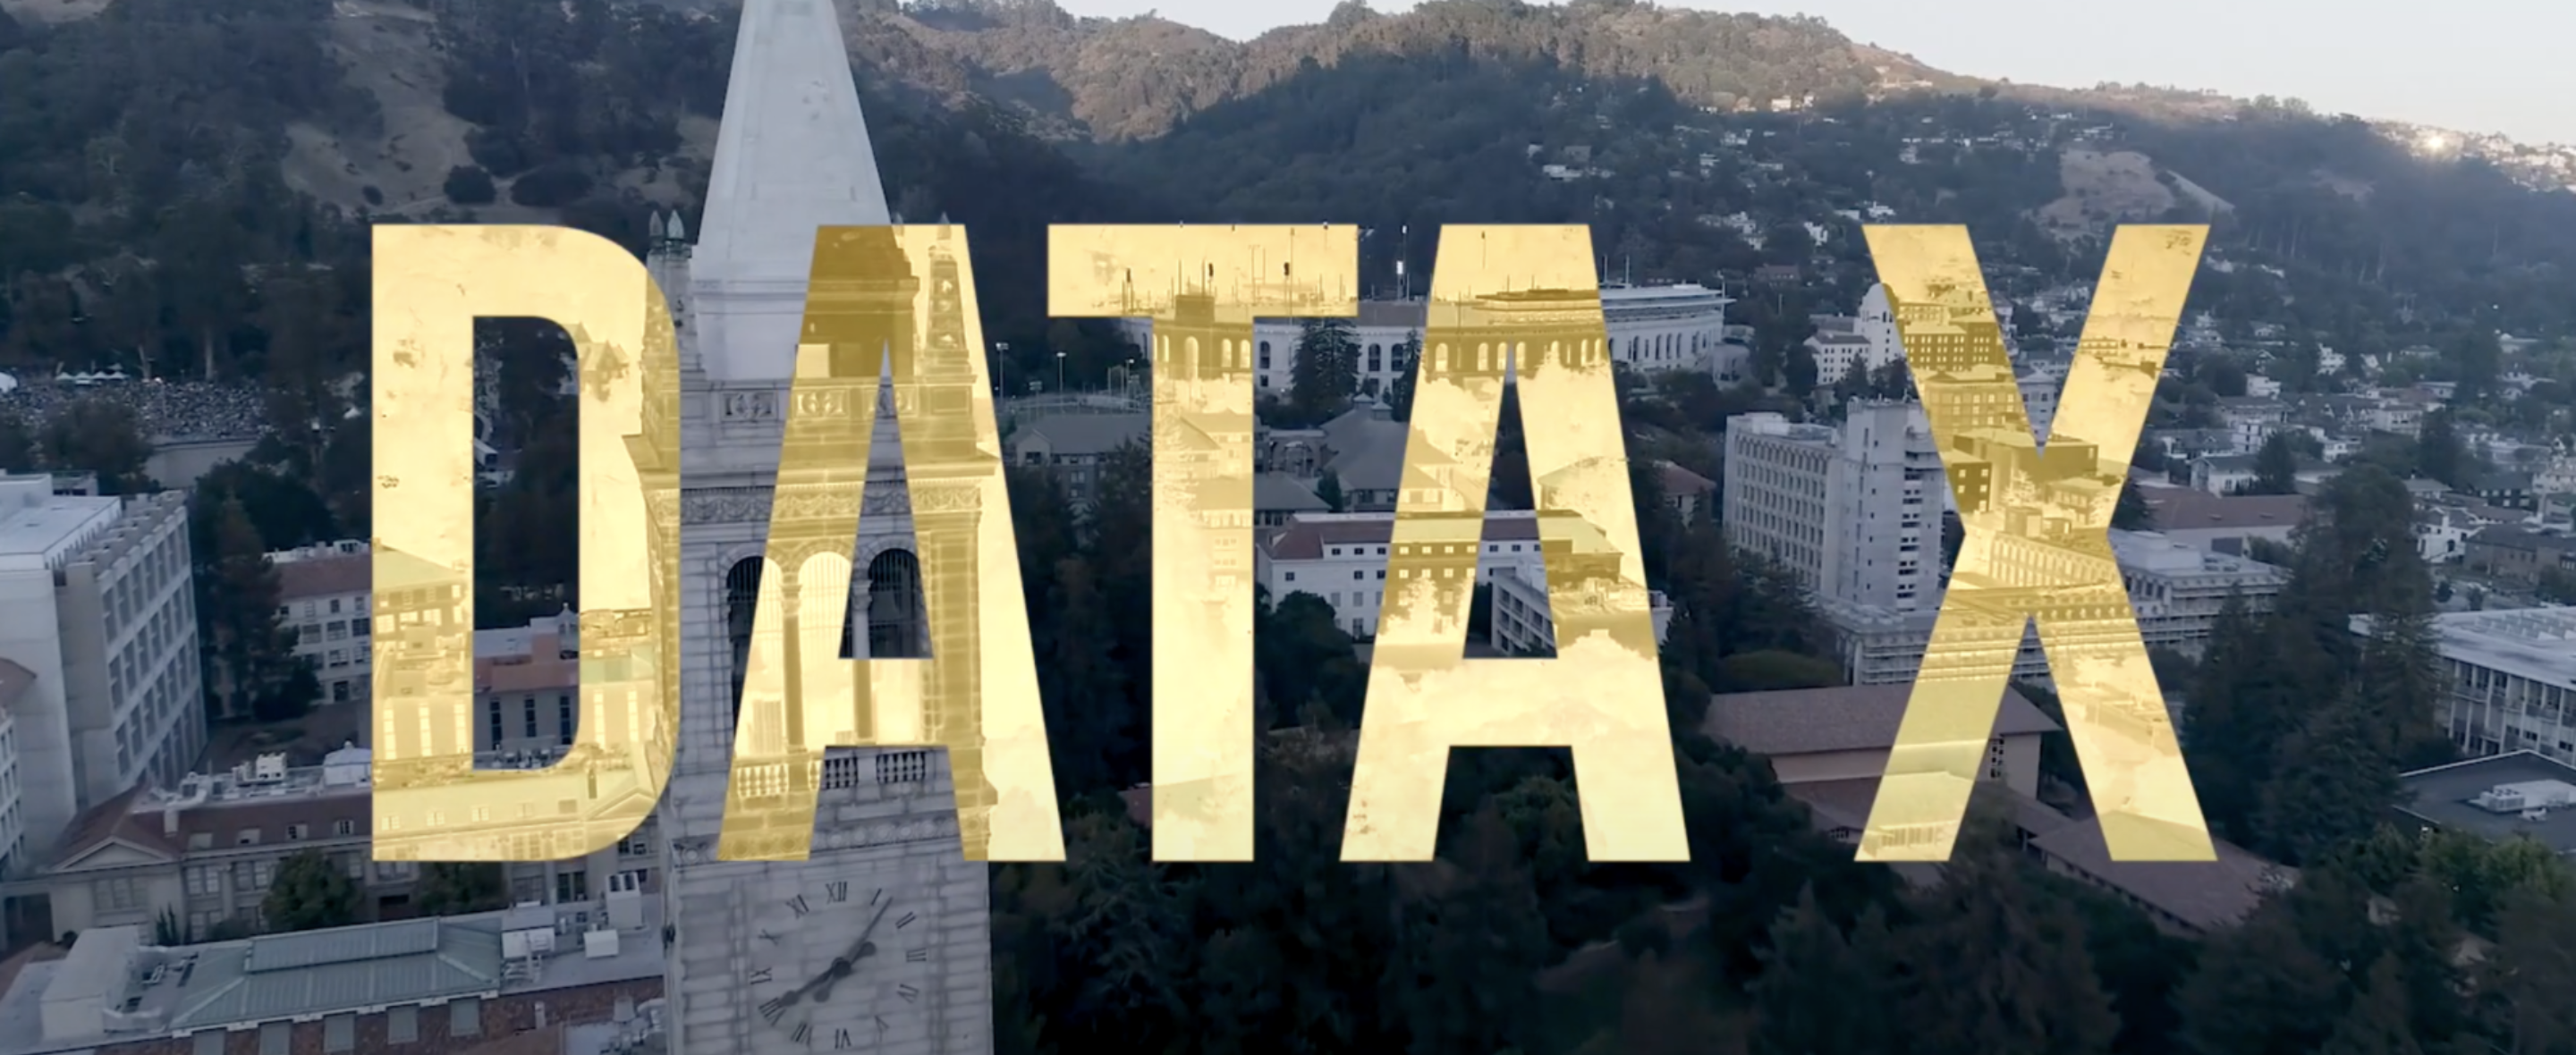

**UC Berkeley**

**Institution**: Sutardja Center for Entreprenurship & Technology (SCET)

**Course**: Data-X (INDENG 135 / 235)

**Semester**: Fall 2021

**Authors & Reviewers**: Ruiqi Guo, Mahan Tajrobehkar, & Derek S. Chan

**Updated**: Thursday, 9/3/2021 PST

**Notebook learning objective**: 
* Among many other checks that could be done, understand a few initial example checks for dataset diversity, quality, and quantity. And reference code examples to start to inform and evaluate your own potential project datasets.
* Use generalizable funtions for different data within the same dataset, and for similar data between different datasets.

If the c notebook is in GitHub, you also can access at https://colab.research.google.com/drive/1EHik0vKL8kPXtoDadk8cjOxjc0ip7QTn?usp=sharing.


# STEP1:Importing required modules and load dataset directories


In [ ]:
# import packages and modules to access and call their functions later
import numpy as np
import pandas as pd

# import ___ vs. from ___ import ____
# https://stackoverflow.com/questions/710551/use-import-module-or-from-module-import

import copy
import csv
!pip install image-quality # install to be able to import below
import imquality.brisque as brisque
import matplotlib.pyplot as plt
import os
import random
import time
import xlrd
import zipfile

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import display
from numpy import *
from PIL import Image 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 146 kB 4.3 MB/s 
     |████████████████████████████████| 170 kB 47.6 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233359 sha256=b862ae068a03e37ed4abc3b9bde4d588cd260523858fcf947e03e9eeb3ae7419
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


The first dataset is [UTKFace](https://susanqq.github.io/UTKFace/). Since the dataset is very large, we already uploaded to the [shared drive folder](https://drive.google.com/file/d/1Rw2VCWW7xFhkAshmwG3MXKVnAmF-QhZ5/view?usp=sharing). After executing the following code lines, you will find this file temporarily stored in that current content directory.

"Highlights
* consists of 20k+ face images in the wild (only single face in one image)
* provides the correspondingly aligned and cropped faces
* provides the corresponding landmarks (68 points)
* images are labelled by age, gender, and ethnicity"

"The labels of each face image is embedded in the file name, formated like 
* [age]_[gender]_[race]_[date&time].jpg
* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace"

**Who labeled the images? And how many people labeled each image as a quality check? Are the labels reliable?**

In [ ]:
# Zip file in one piece is too large for GitHub.
# Download large zip file from Google Drive. 
# https://github.com/wkentaro/gdown
!gdown --id 1Rw2VCWW7xFhkAshmwG3MXKVnAmF-QhZ5 # UTK data

Downloading...
From: https://drive.google.com/uc?id=1Rw2VCWW7xFhkAshmwG3MXKVnAmF-QhZ5
To: /content/UTKFace.zip
121MB [00:01, 67.9MB/s]


To evaluate if a potentially better facial image dataset exists, we could explore the [Fitzpatrick_Classification_by_Ethnicity](https://www.kaggle.com/vinitasilaparasetty/fitzpatrick-classification-by-ethnicity) dataset. Since the dataset is very large, we already uploaded to the [shared drive folder](https://drive.google.com/file/d/16dtlxXXmS8RxPgBW3_9flWAhOUsKoqHh/view?usp=sharing). After executing the following code lines, you will find this file temporarily stored in that current content directory.





In [ ]:
!gdown --id 16dtlxXXmS8RxPgBW3_9flWAhOUsKoqHh # Fitzpatrick_Classification_by_Ethnicity data

Downloading...
From: https://drive.google.com/uc?id=16dtlxXXmS8RxPgBW3_9flWAhOUsKoqHh
To: /content/Fitzpatrick_Classification_by_Ethnicity.zip
237MB [00:03, 78.7MB/s]


Now we extract the datasets to folders named UTK_recognition and 
Face_recognition_Fair and find out the positions for each image


In [ ]:
# Set the zip file paths at the top of the program
Fitzpatrick_file_path = 'Fitzpatrick_Classification_by_Ethnicity.zip'
UTK_file_path = 'UTKFace.zip'

In [ ]:
# https://docs.python.org/3/library/zipfile.html

# Open and read a zip file and store as zip_ref
zip_ref = zipfile.ZipFile(Fitzpatrick_file_path, 'r')

# Extract all members from the zip file to the current working directory
zip_ref.extractall('/content/Face_recognition_Fair')

# Close the archive zip file to ensure essential records will be written
zip_ref.close()

# Repeat the process for another zip file
zip_ref = zipfile.ZipFile(UTK_file_path, 'r')
zip_ref.extractall('/content/UTK_recognition')
zip_ref.close()

In [ ]:
# Set the folder paths at the top of the program to access the dataset images
Img_dir_Fitzpatrick='/content/Face_recognition_Fair/fairface/fairface/train/'
Img_dir_UTK='/content/UTK_recognition/UTKFace/'

View random samples of files
Eventually check if you agree with the labels


In [ ]:
def display_random_images(location, random_seed):

  # List all files in dir
  files = os.listdir(location)

  # set random seed to reproduce results each time
  random.seed(random_seed)

  # choose 10 files at random
  random_files = np.random.choice(files, 10)

  # display 10 of the files
  for i in range(10):
    #print(location + random_files[i])
    img = Image.open(location + random_files[i])
    display(img)
    print("Image quality score:", brisque.score(img))
    print(random_files[i])

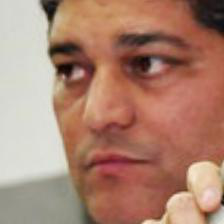

Image quality score: 58.43852922985704
65367.jpg


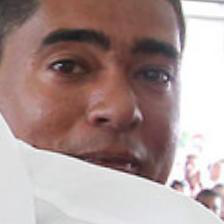

Image quality score: 42.43815223358783
1290.jpg


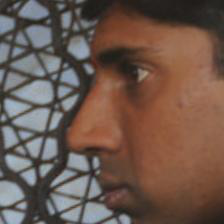

Image quality score: 55.91932792454131
3320.jpg


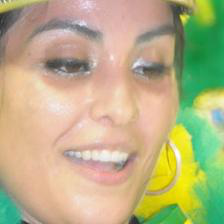

Image quality score: 35.423511846079776
38774.jpg


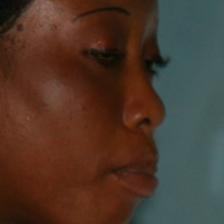

Image quality score: 47.556672600574956
62873.jpg


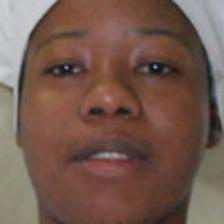

Image quality score: 50.109527770584776
1936.jpg


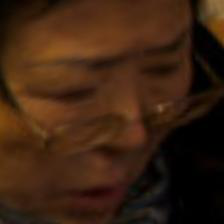

Image quality score: 67.23641237438889
79103.jpg


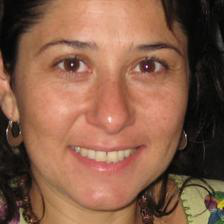

Image quality score: 20.592700886113647
42331.jpg


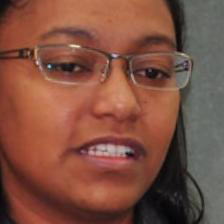

Image quality score: 31.298438920723555
49961.jpg


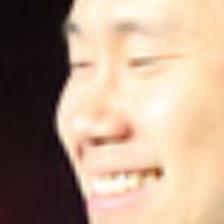

Image quality score: 65.24145344086477
65379.jpg


In [ ]:
display_random_images(location=Img_dir_Fitzpatrick, random_seed=30)

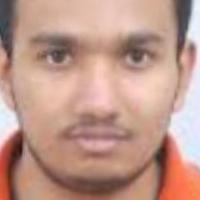

Image quality score: 55.645837156551664
21_0_3_20170119154046385.jpg.chip.jpg


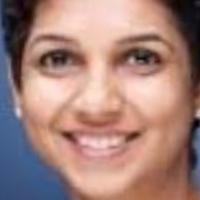

Image quality score: 57.44811798353496
43_1_3_20170109132235319.jpg.chip.jpg


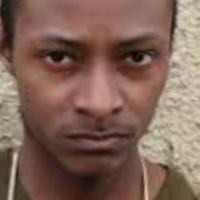

Image quality score: 31.899594782412322
25_0_1_20170113173633210.jpg.chip.jpg


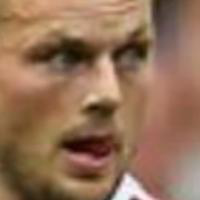

Image quality score: 61.61452417962752
29_0_0_20170117010705850.jpg.chip.jpg


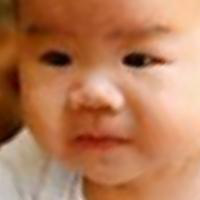

Image quality score: 61.07615229559471
1_0_2_20161219153300420.jpg.chip.jpg


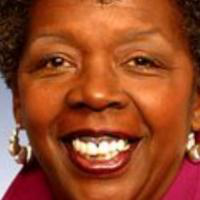

Image quality score: 36.713976508798254
63_1_1_20170110120101291.jpg.chip.jpg


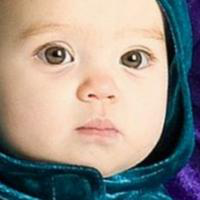

Image quality score: 17.801531670696107
1_0_0_20170109194350047.jpg.chip.jpg


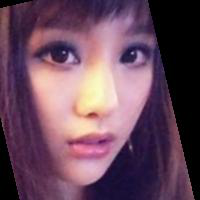

Image quality score: 37.953152970994864
20_1_2_20170116163810477.jpg.chip.jpg


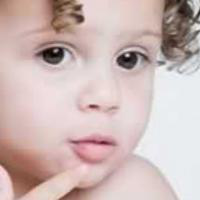

Image quality score: 42.28937658979223
3_0_0_20170110213136600.jpg.chip.jpg


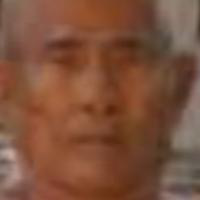

Image quality score: 63.961950265460786
62_0_2_20170112191340365.jpg.chip.jpg


In [ ]:
display_random_images(location=Img_dir_UTK, random_seed=1000)

Here we define a function to visualize the dataset distribution regarding each labels, which would be used for UTK and Fitzpatrick dataset in the later sub-sections

In [ ]:
def dataset_diversity_count(df1): # The input df1 is assumed to be a dataframe
  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html, 
  # We make a copy of the object's indices and data
  df=df1.copy()
  # https://www.w3schools.com/python/ref_func_enumerate.asp
  # The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object, and adds a counter as the key of the enumerate object.
  # pandas.columns returns the column names of dataframe
  for _,i in enumerate(df.columns):
    if i not in ['file']:
        # Now i is the string type value that is one of the ['gender','race','age',…]
        print('Column_name:',i)
        # https://pandas.pydata.org/docs/reference/api/pandas.unique.html
        # Call the unique function of pandas dataframe to get unique elements in specific column         
        unique_list=df[i].unique()
        Unique_number=len(unique_list)
        print('Unique element number:',Unique_number)
        # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
        # Call the value_counts function of pandas dataframe to get the total numbers of unique elements in specific column 
        Unique_value_count=df[i].value_counts(sort=True, ascending=False)
        print(Unique_value_count)
        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
        # Use the plot function with kind='bar' of dataframe to get the histogram with element name and corresponding number of samples
        if Unique_number<21:
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
            # Adjust figure size according to number of elements via matplotlib.pyplot.figure
            plt.figure(figsize=(1*Unique_number,5))
            Unique_value_count.plot(kind='bar')
        else:
            
            plt.figure(figsize=(20,5))
            Unique_value_count.plot(kind='bar')
        plt.show()
        plt.close()

## 1.1 Now we create a dataframe of labels for the UTK dataset


In [ ]:
# confirm what a small part of the code does

print(Img_dir_UTK)
print()

os.listdir(Img_dir_UTK)[:5]

/content/UTK_recognition/UTKFace/



['36_1_1_20170112213416311.jpg.chip.jpg',
 '32_1_3_20170109141339133.jpg.chip.jpg',
 '28_1_0_20170103183935666.jpg.chip.jpg',
 '30_0_2_20170116170814123.jpg.chip.jpg',
 '16_1_0_20170104013358122.jpg.chip.jpg']

In [ ]:
# confirm what small parts of the code do

for file in os.listdir(Img_dir_UTK)[:5]:
  print(file)

  prefix = file.split(".")[0]
  print(prefix)

  demographics = list(map(int, prefix.split("_")[:3]))
  print(demographics)
  print()

36_1_1_20170112213416311.jpg.chip.jpg
36_1_1_20170112213416311
[36, 1, 1]

32_1_3_20170109141339133.jpg.chip.jpg
32_1_3_20170109141339133
[32, 1, 3]

28_1_0_20170103183935666.jpg.chip.jpg
28_1_0_20170103183935666
[28, 1, 0]

30_0_2_20170116170814123.jpg.chip.jpg
30_0_2_20170116170814123
[30, 0, 2]

16_1_0_20170104013358122.jpg.chip.jpg
16_1_0_20170104013358122
[16, 1, 0]



In [ ]:
## Create a dataframe consisting of the images and their attributes

# Create empty list
content = []

# Print number of images
print("Records before:", len(os.listdir(Img_dir_UTK)))

# Use for loop to extract information from each filename in a list containing the filennames in the directory
for file in os.listdir(Img_dir_UTK):
    
  # Create empty list
  content_element = []

  # If the suffix after the . is an image suffix
  if file.split(".")[1] in ('jpg', 'jpeg', 'png', 'tiff') :
    
    # Take the filename before the .
    prefix = file.split(".")[0]
    
    # https://www.w3schools.com/python/ref_func_map.asp
    # map(function, iterables) to make each demographic data an integer
    demographics = list(map(int, prefix.split("_")[:3]))
    
    # If race value is 0-4
    if demographics[2] in (0,1,2,3,4):
        # For each image, append filename, age, gender, and race data to the list, content_element 
        content_element.extend([file, demographics[0], demographics[1], demographics[2]])
    
        # For each image, append a list to a list of lists
        content.append(content_element)
    
print("Records after:", len(content))

df = pd.DataFrame(content, columns=['file', 'age', 'gender', 'race'])

# Drop which rows have missing values
df = df.dropna(axis=0).reindex()
print("Records in dataframe:", df.shape)

print()
print(df.dtypes)

df_UTK=df.copy()

print()
print("example filename: 35_1_1_20170117194907090.jpg.chip.jpg")
df_UTK.head()

Records before: 23708
Records after: 23704
Records in dataframe: (23704, 4)

file      object
age        int64
gender     int64
race       int64
dtype: object

example filename: 35_1_1_20170117194907090.jpg.chip.jpg


file  age  gender  race
0  36_1_1_20170112213416311.jpg.chip.jpg   36       1     1
1  32_1_3_20170109141339133.jpg.chip.jpg   32       1     3
2  28_1_0_20170103183935666.jpg.chip.jpg   28       1     0
3  30_0_2_20170116170814123.jpg.chip.jpg   30       0     2
4  16_1_0_20170104013358122.jpg.chip.jpg   16       1     0

In [ ]:
## The portion of samples per gender per age
age_category = df['age'].copy()

for i in range(len(age_category)):
    
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
    a = age_category.iloc[i]
    
    if   a <= 20: b = 0
    elif a <= 30: b = 1
    elif a <= 40: b = 2
    elif a <= 50: b = 3
    elif a <= 60: b = 4
    elif a <= 70: b = 5
    else:         b = 6
    
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
    # Purely integer-location based indexing for selection by position
    age_category.iloc[i] = b
# Assign the new catagorical values to the age column of df_UTK 
df_UTK['age']=age_category
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# Switch the 'age','gender' columns of df_UTK to the string format using the map function          
df_UTK['age']=df_UTK['age'].map({0:  '0-20', 
                                 1: '21-30',
                                 2: '31-40',
                                 3: '41-50',
                                 4: '51-60',
                                 5: '61-70',
                                 6: '71+'})  

df_UTK['gender'] = df_UTK['gender'].map({0: 'Male', 
                                         1: 'Female'}) 

df_UTK['race'] = df_UTK['race'].map({0: 'White', 
                                     1: 'Black',
                                     2: 'Asian',
                                     3: 'Indian',
                                     4: 'Others'}) 

n_images=len(age_category)   

temp = pd.concat((df['gender'], age_category), axis=1)
temp = temp.groupby(['gender', 'age']).size() / n_images * 100
print(temp)

df3 = pd.DataFrame(data=temp.values.reshape((2, 7)), 
                   index=['Male', 'Female'], 
                   columns=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+'])

display(df3.round(decimals=2).astype('str') + '%')

gender  age
0       0       9.395039
        1      13.963888
        2      10.445494
        3       6.142423
        4       6.496794
        5       3.273709
        6       2.552312
1       0      11.179548
        1      18.874452
        2       7.855214
        3       2.716841
        4       2.826527
        5       1.662167
        6       2.615592
dtype: float64


0-20   21-30   31-40  41-50  51-60  61-70    71+
Male      9.4%  13.96%  10.45%  6.14%   6.5%  3.27%  2.55%
Female  11.18%  18.87%   7.86%  2.72%  2.83%  1.66%  2.62%

In [ ]:
# Show the headers of df_UTK
df_UTK.head()

file    age  gender    race
0  36_1_1_20170112213416311.jpg.chip.jpg  31-40  Female   Black
1  32_1_3_20170109141339133.jpg.chip.jpg  31-40  Female  Indian
2  28_1_0_20170103183935666.jpg.chip.jpg  21-30  Female   White
3  30_0_2_20170116170814123.jpg.chip.jpg  21-30    Male   Asian
4  16_1_0_20170104013358122.jpg.chip.jpg   0-20  Female   White

Column_name: age
Unique element number: 7
21-30    7784
0-20     4877
31-40    4338
51-60    2210
41-50    2100
71+      1225
61-70    1170
Name: age, dtype: int64


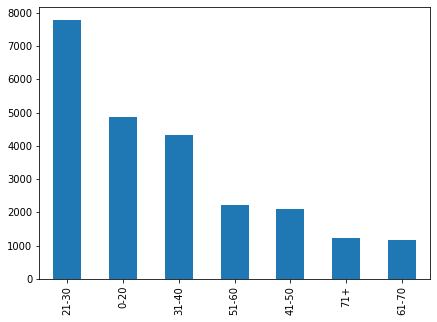

Column_name: gender
Unique element number: 2
Male      12390
Female    11314
Name: gender, dtype: int64


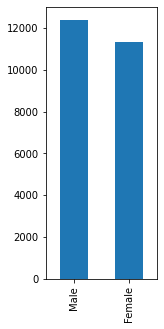

Column_name: race
Unique element number: 5
White     10077
Black      4526
Indian     3975
Asian      3434
Others     1692
Name: race, dtype: int64


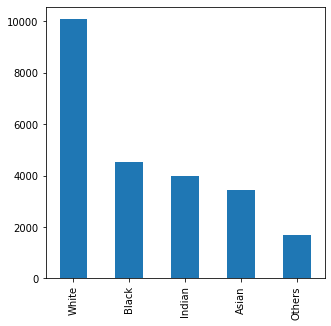

In [ ]:
# Now you can scroll down to see sample distribution
dataset_diversity_count(df_UTK)

## 1.2 Now we create the dataframe of labels for the Fitzpatrick dataset


In [ ]:
# This part takes 10 mins to execute
# https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html
# Creating dataframe of the Fitzpatrick labeled data from the provided csv data, 
# But since there are some filenames not in Img_dir, we need to remove.
df_Fitzpatrick=pd.read_csv('/content/Face_recognition_Fair/fitz_undersampled_train_final.csv')

# Iterate through all the files
for i in range(len(df_Fitzpatrick['file'])):
  file=df_Fitzpatrick['file'][i]
  if file not in os.listdir(Img_dir_Fitzpatrick):
    print(file)
    df_Fitzpatrick=df_Fitzpatrick.drop([i])
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
# Save the remaining labeled data to a new csv file
df_Fitzpatrick.to_csv('/content/Face_recognition_Fair/df_Fitzpatrick_original.csv')

28544.jpg
31948.jpg
3339.jpg
34114.jpg
47808.jpg
56453.jpg


In [ ]:
# Read in the new csv file
df_Fitzpatrick=pd.read_csv('/content/Face_recognition_Fair/df_Fitzpatrick_original.csv')

df_Fitzpatrick = df_Fitzpatrick.loc[:, ~df_Fitzpatrick.columns.str.contains('^Unnamed')]

df_Fitzpatrick['phototype'] = df_Fitzpatrick['phototype'].map({'I & II':  'Skin Type I & II', 
                                                               'III':     'Skin Type III',
                                                               'IV':      'Skin Type IV',
                                                               'V':       'Skin Type V',
                                                               'VI':      'Skin Type VI'})

df_Fitzpatrick['age'] = df_Fitzpatrick['age'].map({'20-29': 'Age 20-29', 
                                                   '30-39': 'Age 30-39',
                                                   '40-49': 'Age 40-49',
                                                   '50-59': 'Age 50-59',
                                                   '60-69': 'Age 60-69'})

In [ ]:
df_Fitzpatrick.head()

file        age  gender            race         phototype
0      1.jpg  Age 50-59    Male      East Asian     Skin Type III
1     10.jpg  Age 30-39    Male  Middle Eastern       Skin Type V
2    100.jpg  Age 20-29  Female      East Asian     Skin Type III
3   1000.jpg  Age 30-39    Male           White  Skin Type I & II
4  10004.jpg  Age 40-49    Male          Indian       Skin Type V

Column_name: age
Unique element number: 7
21-30    7784
0-20     4877
31-40    4338
51-60    2210
41-50    2100
71+      1225
61-70    1170
Name: age, dtype: int64


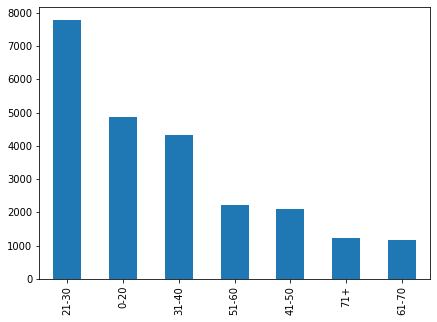

Column_name: gender
Unique element number: 2
Male      12390
Female    11314
Name: gender, dtype: int64


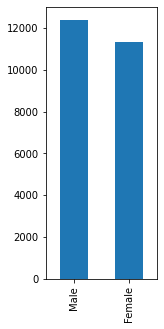

Column_name: race
Unique element number: 5
White     10077
Black      4526
Indian     3975
Asian      3434
Others     1692
Name: race, dtype: int64


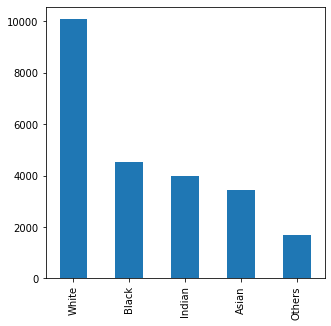

In [ ]:
dataset_diversity_count(df_UTK)

# Step 2 Recording samples quantity and diversity among different demographics

Now let's assume a simple application senario where we want to identify the gender of faces. We want to clearly obtain the sample quantity and diversity information with the code lines shown below. Here we define one function **quant_div()** to do the task, students can use their own methods.

In [ ]:
# confirm what a small part of the code does

print(df_UTK.head())
print()

# create another dataframe, subset to female only
df_Female=df_UTK[df_UTK['gender']=='Female']

print(df_Female.head())
print()

# return the first element of a tuple for the length of the dataframe)
print(df_UTK.shape[0])
print(df_Female.shape[0])
print()

print(df_UTK.columns)
print()

                                    file    age  gender    race
0  36_1_1_20170112213416311.jpg.chip.jpg  31-40  Female   Black
1  32_1_3_20170109141339133.jpg.chip.jpg  31-40  Female  Indian
2  28_1_0_20170103183935666.jpg.chip.jpg  21-30  Female   White
3  30_0_2_20170116170814123.jpg.chip.jpg  21-30    Male   Asian
4  16_1_0_20170104013358122.jpg.chip.jpg   0-20  Female   White

                                    file    age  gender    race
0  36_1_1_20170112213416311.jpg.chip.jpg  31-40  Female   Black
1  32_1_3_20170109141339133.jpg.chip.jpg  31-40  Female  Indian
2  28_1_0_20170103183935666.jpg.chip.jpg  21-30  Female   White
4  16_1_0_20170104013358122.jpg.chip.jpg   0-20  Female   White
5   5_1_2_20161219203429011.jpg.chip.jpg   0-20  Female   Asian

23704
11314

Index(['file', 'age', 'gender', 'race'], dtype='object')



In [ ]:
# confirm what a small part of the code does

# df_Female[1] returns df_Female["race"]
print(df_Female["race"])
print(df_Female["race"].value_counts(sort=True, ascending=False))

0         Black
1        Indian
2         White
4         White
5         Asian
          ...  
23694     White
23696    Indian
23697     White
23699     White
23700    Others
Name: race, Length: 11314, dtype: object
White     4601
Black     2208
Asian     1859
Indian    1714
Others     932
Name: race, dtype: int64


In [ ]:
total_Female=df_Female.shape[0]

Unique_value_count_Female=df_Female["race"].value_counts(sort=False, ascending=False)

Unique_value_count_Female=pd.Series(["{0:.2f}%".format(val /total_Female*100) 
for val in Unique_value_count_Female], index = Unique_value_count_Female.index)

print(Unique_value_count_Female)
print()

s4 = pd.Series([total_Female], index=['Total_Samples']) 
print(s4)
print()

Unique_value_count_Female=Unique_value_count_Female.append(s4).rename("Female")
Unique_value_count_Female

White     40.67%
Black     19.52%
Asian     16.43%
Indian    15.15%
Others     8.24%
dtype: object

Total_Samples    11314
dtype: int64



White            40.67%
Black            19.52%
Asian            16.43%
Indian           15.15%
Others            8.24%
Total_Samples     11314
Name: Female, dtype: object

In [ ]:
# This is the function where input is the selected label dataframe
# And the output is the dictionary that records sample_amount information
def quant_div(df1):
  df=df1.copy()
  # create a dataframe subset to male only
  df_Male=df[df['gender']=='Male']
  # create a dataframe subset to female only
  df_Female=df[df['gender']=='Female']
  # https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html
  # Get the total number of elements in dataframes via pandas.DataFrame.shape
  total_Male=df_Male.shape[0]
  total_Female=df_Female.shape[0]
  # Create an empty dictionary
  sample_amount_dictionary={}
  # Enumerate on the different column names to get the cross-category statistics between 'gender' column and the rest.
  for _,i in enumerate(df.columns):
    if i not in ['file','gender']:
      # Now i is the string type value that is one of the ['race','age',…]
      # Call the value_counts to get the total numbers of unique elements in specific column i
      # https://pandas.pydata.org/docs/reference/api/pandas.Series.html
      # The returned Unique_value_count_Male variable is a pd.Series type     
      Unique_value_count_Male=df_Male[i].value_counts(sort=False, ascending=False)
      # Replace the Unique_value_count_Male variable with a new created pd.Series type
      # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
      # The new pd.Series type has the same index as the original one
      # https://stackoverflow.com/questions/23981601/format-certain-floating-dataframe-columns-into-percentage-in-pandas
      # The element values of new pd.Series type are changed to the percentage of samples, where total sample number serves as denominator
      # {0:.2f} indicates that the values are two decimal float
      Unique_value_count_Male=pd.Series(["{0:.2f}%".format(val /total_Male*100) for val in Unique_value_count_Male], 
                                        index = Unique_value_count_Male.index)
      # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html
      # Sort the Unique_value_count_Male according to the index values, default acsending
      Unique_value_count_Male=Unique_value_count_Male.sort_index()
      # Create a new index 'Total_Samples' to record total samples of the gender type
      s3 = pd.Series([total_Male], index=['Total_Samples'])
      # https://pandas.pydata.org/docs/reference/api/pandas.Series.append.html
      # https://pandas.pydata.org/docs/reference/api/pandas.Series.rename.html
      # Concatenate the total sample information to Unique_value_count_Male and name the variable as "Male"
      Unique_value_count_Male=Unique_value_count_Male.append(s3).rename("Male")
      # Replicate the above operations on the df_Female
      Unique_value_count_Female=df_Female[i].value_counts(sort=False, ascending=False)
      Unique_value_count_Female=pd.Series(["{0:.2f}%".format(val /total_Female*100) for val in Unique_value_count_Female], index = Unique_value_count_Female.index)
      Unique_value_count_Female=Unique_value_count_Female.sort_index()
      s4 = pd.Series([total_Female], index=['Total_Samples'])
      Unique_value_count_Female=Unique_value_count_Female.append(s4).rename("Female")
      # https://pandas.pydata.org/docs/reference/api/pandas.concat.html
      # Concatenate the Unique_value_count_Female and Unique_value_count_Male horizontaly and assign the new pd.Series type to Concateseries
      Concateseries=pd.concat([Unique_value_count_Female,
                               Unique_value_count_Male], 
                              axis=1)
      # https://www.geeksforgeeks.org/python-pandas-dataframe-swapaxes/
      # Transpose the index and columns of Concateseries
      Concateseries=Concateseries.swapaxes("index", "columns")
      # https://www.w3schools.com/python/ref_dictionary_update.asp
      # Add Concateseries to the sample_amount_dictionary
      sample_amount_dictionary.update({i:Concateseries})
  return sample_amount_dictionary



## 2.1 Now analyze the sample quantity and diversity information for the UTK dataset

In [ ]:
sample_amount_dictionary=quant_div(df_UTK)

In [ ]:
# Dictionary items are presented in key:value pairs
print(sample_amount_dictionary)

{'age':           0-20   21-30   31-40   41-50   51-60  61-70    71+ Total_Samples
Female  23.42%  39.54%  16.46%   5.69%   5.92%  3.48%  5.48%         11314
Male    17.97%  26.72%  19.98%  11.75%  12.43%  6.26%  4.88%         12390, 'race':          Asian   Black  Indian Others   White Total_Samples
Female  16.43%  19.52%  15.15%  8.24%  40.67%         11314
Male    12.71%  18.71%  18.25%  6.13%  44.20%         12390}


In [ ]:
# for the key:value pair, get the value of the "race" key
display(sample_amount_dictionary['race'])

Asian   Black  Indian Others   White Total_Samples
Female  16.43%  19.52%  15.15%  8.24%  40.67%         11314
Male    12.71%  18.71%  18.25%  6.13%  44.20%         12390

In [ ]:
# for the key:value pair, get the value of the "age" key
display(sample_amount_dictionary['age'])

0-20   21-30   31-40   41-50   51-60  61-70    71+ Total_Samples
Female  23.42%  39.54%  16.46%   5.69%   5.92%  3.48%  5.48%         11314
Male    17.97%  26.72%  19.98%  11.75%  12.43%  6.26%  4.88%         12390

As examples, notice from the data output above: 
* Facial images of women who are White or Indian are under-represented compared to that of men who are are White or Indian, respectively.
* Facial images of men who are Asian are under-represented compared to that of women who are Asian.
* Overall, facial images of women are significantly over-represented in the age 0-30 range, but significantly under-represented in the 31-60 age range.
* While we could weight, for example, images by group (e.g., count some images more than once in an eventual AI/data system), that still might not prevent a biased system. 

Quantity of images is not the same as diversity and quality of images. Diverity in image resolution quality can also be important, for example.

## 2.2 Here we present the analysis for df_Fitzpatrick dataset

In [ ]:
sample_amount_dictionary=quant_div(df_Fitzpatrick)

In [ ]:
display(sample_amount_dictionary['race'])

Black East Asian Indian  ... Southeast Asian   White Total_Samples
Female  23.26%     22.33%  7.09%  ...           5.93%  18.29%         17711
Male    16.73%     17.68%  8.13%  ...           6.54%  21.71%         17713

[2 rows x 8 columns]

In [ ]:
display(sample_amount_dictionary['age'])

Age 20-29 Age 30-39 Age 40-49 Age 50-59 Age 60-69 Total_Samples
Female    47.38%    28.29%    13.56%     7.54%     3.22%         17711
Male      33.54%    31.04%    19.16%    11.52%     4.74%         17713

In [ ]:
display(sample_amount_dictionary['phototype'])

Skin Type I & II Skin Type III  ... Skin Type VI Total_Samples
Female           18.29%        22.33%  ...       23.26%         17711
Male             21.71%        17.68%  ...       16.73%         17713

[2 rows x 6 columns]

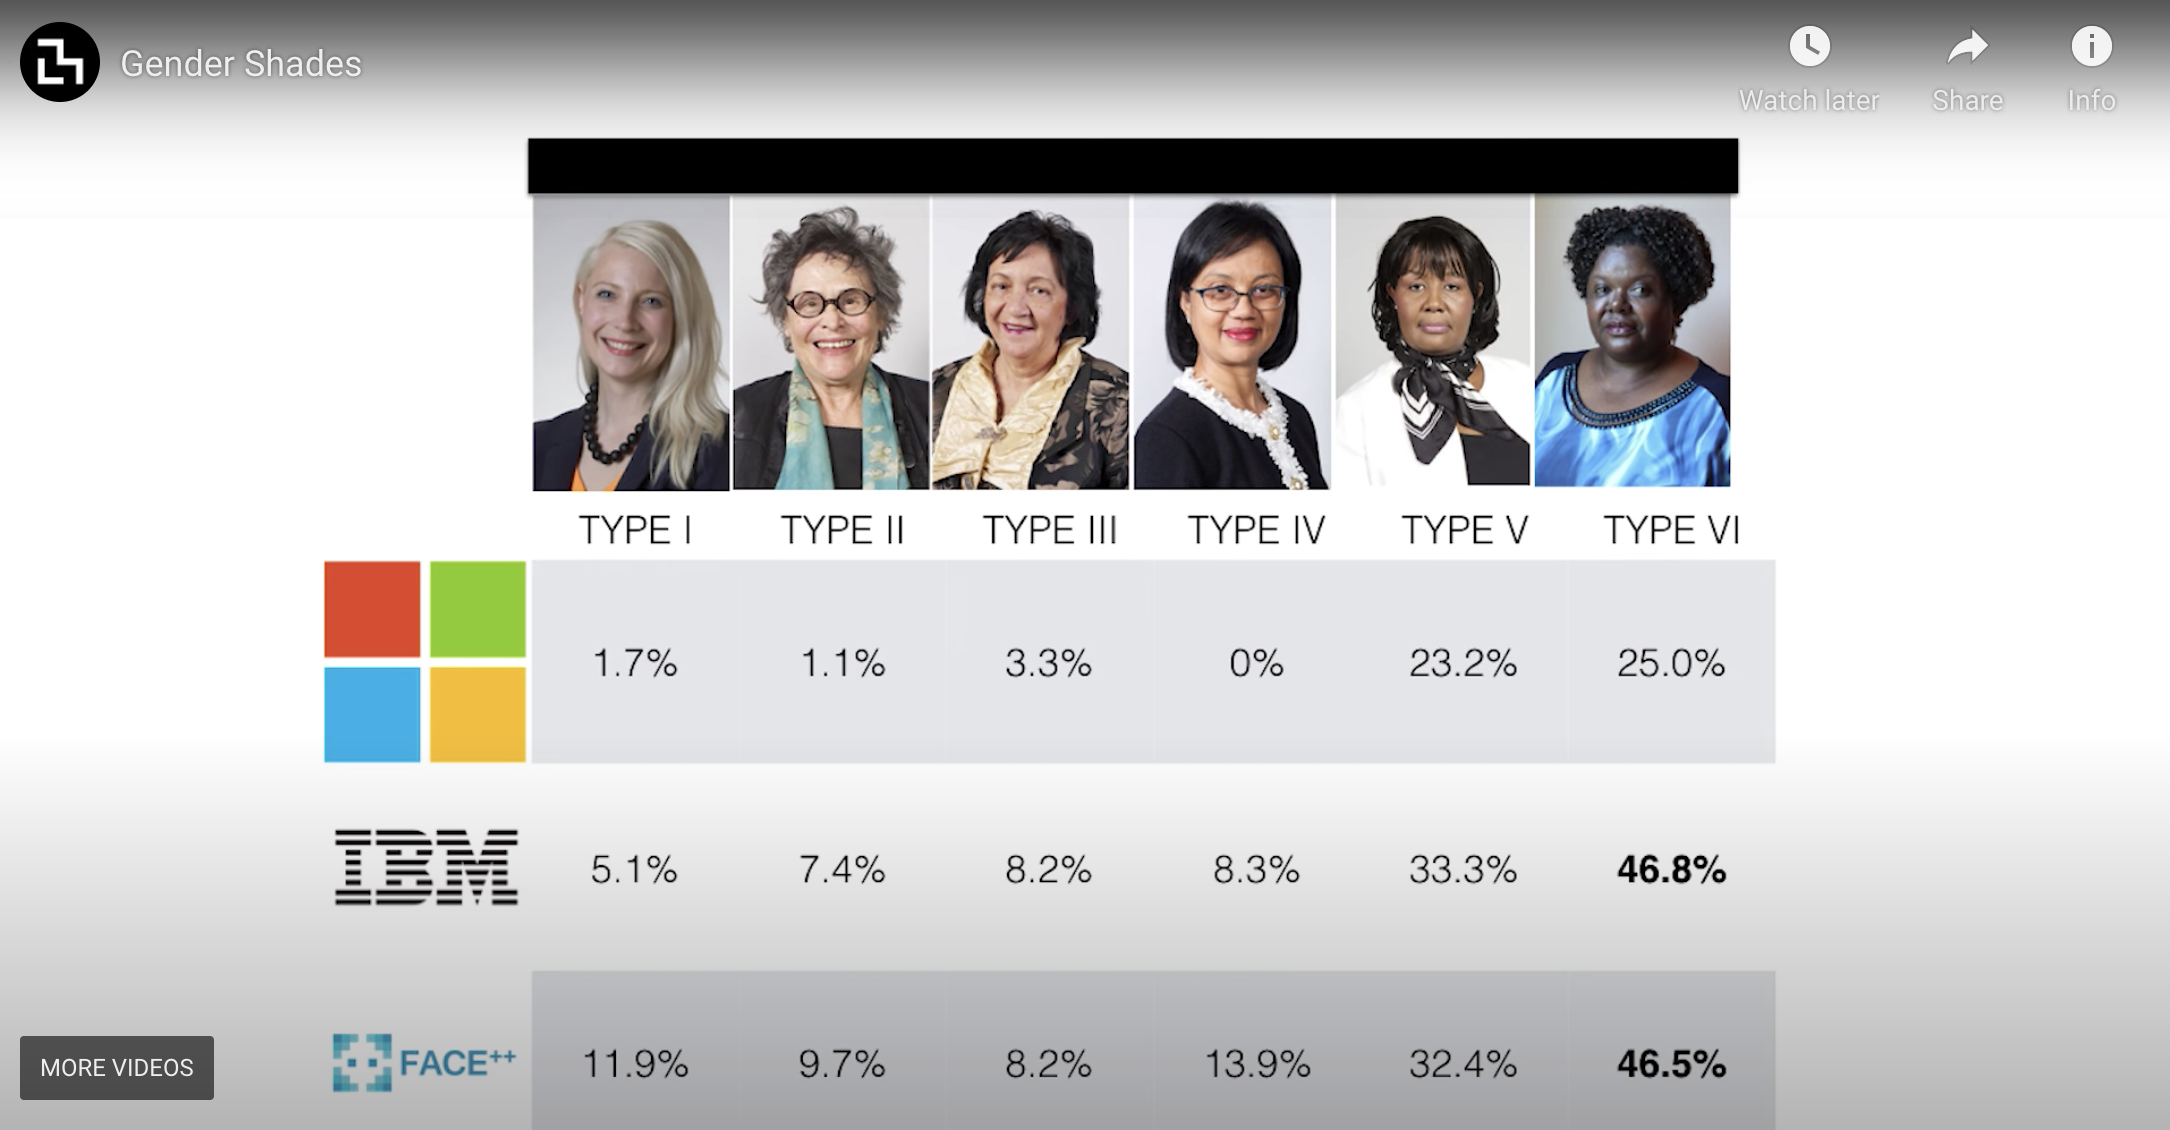

As examples, notice from the data output above: 
* The Fitzpatrick dataset has more granular race / ethnicity categories than the UTK. 
* Facial images of women with lighter skin are under-represnted compared to that of men, but with the darkest skin are over-represented compared to that of men.
* While we could weight, for example, woman images to equalize to that of men, that still might not solve potential problems. Quantity of images is not the same as diversity of images. And diversity can reflect more than age, gender, or race / ethnicity.
* While we could weight, for example, images by group (e.g., count some images more than once in an eventual AI/data system), that still might not prevent a biased system. 

Quantity of images is not the same as diversity and quality of images. Diverity in image resolution quality can also be important, for example.

# Step 3 Get the image quality information

Though the 3 images below are the same size, their DPI (Dots Per Inch) differ, and thus their image clarity differ.

Source below: https://www.quora.com/Can-I-change-the-dpi-from-72-on-a-picture-in-Photoshop-and-then-make-it-300-and-it-will-print-well-on-a-shirt


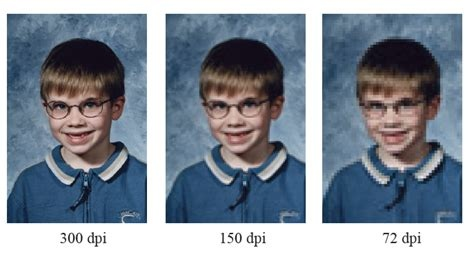

In this section we need to read in the image and get the width and height.

In [ ]:
def get_imagesize(df1,imgdir):
  from PIL import Image 
  df=df1.copy()
  image_width=[]
  image_height=[]
  for i in range(df.shape[0]):
    image_size=Image.open(imgdir+df['file'][i])
    image_width.append(image_size.size[0])
    image_height.append(image_size.size[1])
  df['image_width']=image_width
  df['image_height']=image_height
  for _,i in enumerate(df.columns):
    if i not in ['file','gender','image_width','image_height']:  
      df_w=df[['gender', i,'image_width']]
      s_w=df_w.groupby(['gender', i]).mean()
      df_w = pd.DataFrame(data=s_w.values.reshape((2, len(df[i].unique().tolist()))), index=['Male', 'Female'], 
                      columns=df[i].unique())
      print(i)
      print('Width')
      display(df_w)
      df_h=df[['gender', i,'image_height']]
      s_h=df_h.groupby(['gender', i]).mean()
      df_h = pd.DataFrame(data=s_h.values.reshape((2, len(df[i].unique().tolist()))), index=['Male', 'Female'], 
                      columns=df[i].unique())
      print('Height')
      display(df_h)
      print()

## 3.1 With the above function we aim to do the image size for the Fitzpatrick dataset

In [ ]:
get_imagesize(df_Fitzpatrick,Img_dir_Fitzpatrick)

age
Width


Age 50-59  Age 30-39  Age 20-29  Age 40-49  Age 60-69
Male          224        224        224        224        224
Female        224        224        224        224        224

Height


Age 50-59  Age 30-39  Age 20-29  Age 40-49  Age 60-69
Male          224        224        224        224        224
Female        224        224        224        224        224


race
Width


East Asian  Middle Eastern  ...  Latino_Hispanic  Black
Male           224             224  ...              224    224
Female         224             224  ...              224    224

[2 rows x 7 columns]

Height


East Asian  Middle Eastern  ...  Latino_Hispanic  Black
Male           224             224  ...              224    224
Female         224             224  ...              224    224

[2 rows x 7 columns]


phototype
Width


Skin Type III  Skin Type V  ...  Skin Type IV  Skin Type VI
Male              224          224  ...           224           224
Female            224          224  ...           224           224

[2 rows x 5 columns]

Height


Skin Type III  Skin Type V  ...  Skin Type IV  Skin Type VI
Male              224          224  ...           224           224
Female            224          224  ...           224           224

[2 rows x 5 columns]

## 3.2 With the above function we aim to do the image size for the UTC dataset

In [ ]:
Img_dir_UTK+df['file'][0]

'/content/UTK_recognition/UTKFace/36_1_1_20170112213416311.jpg.chip.jpg'

In [ ]:
get_imagesize(df_UTK,Img_dir_UTK)

age
Width


31-40  21-30  0-20  71+  41-50  51-60  61-70
Male      200    200   200  200    200    200    200
Female    200    200   200  200    200    200    200

Height


31-40  21-30  0-20  71+  41-50  51-60  61-70
Male      200    200   200  200    200    200    200
Female    200    200   200  200    200    200    200


race
Width


Black  Indian  White  Asian  Others
Male      200     200    200    200     200
Female    200     200    200    200     200

Height


Black  Indian  White  Asian  Others
Male      200     200    200    200     200
Female    200     200    200    200     200

Since the brisque.score() function takes 0.5 seconds per image, producing such tables for each dataset takes roughly 3-4 hours. Thus the function calls below are commented out.

One also could consider a random sample and run for initial faster results, then to run on the each full sample overnight.

In [ ]:
def avg_brisque_score(df1, imgdir):
  df = df1.copy()
  brisque_score = df['file'].apply(lambda x: brisque.score(Image.open(imgdir+x)))
  gender = df['gender']
  df.drop(columns=['file', 'gender'], inplace=True)
  for _, i in enumerate(df.columns):
    s = pd.concat((gender, df[i], brisque_score), axis=1).groupby(['gender', 
                                                                 i]).mean()
    df_ = pd.DataFrame(data=s.values.reshape((2, len(df[i].unique().tolist()))), 
                       index=['Male', 'Female'], columns=df[i].unique())
    display(df_.round(decimals=2))

The image quality of the Fitzpatrick dataset:

In [ ]:
#avg_brisque_score(df_Fitzpatrick, Img_dir_Fitzpatrick)

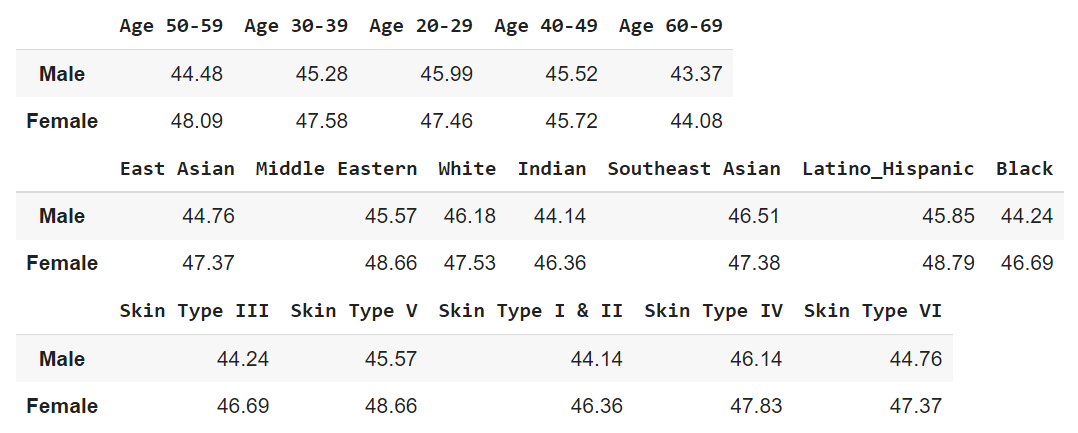

The image quality of the UTK dataset:

In [ ]:
#avg_brisque_score(df_UTK, Img_dir_UTK)

Fitzpatrick results, f1-scores by cross-tabulation of gender and race / ethnicity, skin type, and age

In the context below, for example, f1-score means if you take a 1st record of an image that relfects a Black woman, and you take a 2nd record of an image that doesn't reflect a Black woman, the 1st record will have higher probability than the 2nd record that the image is a Black woman.

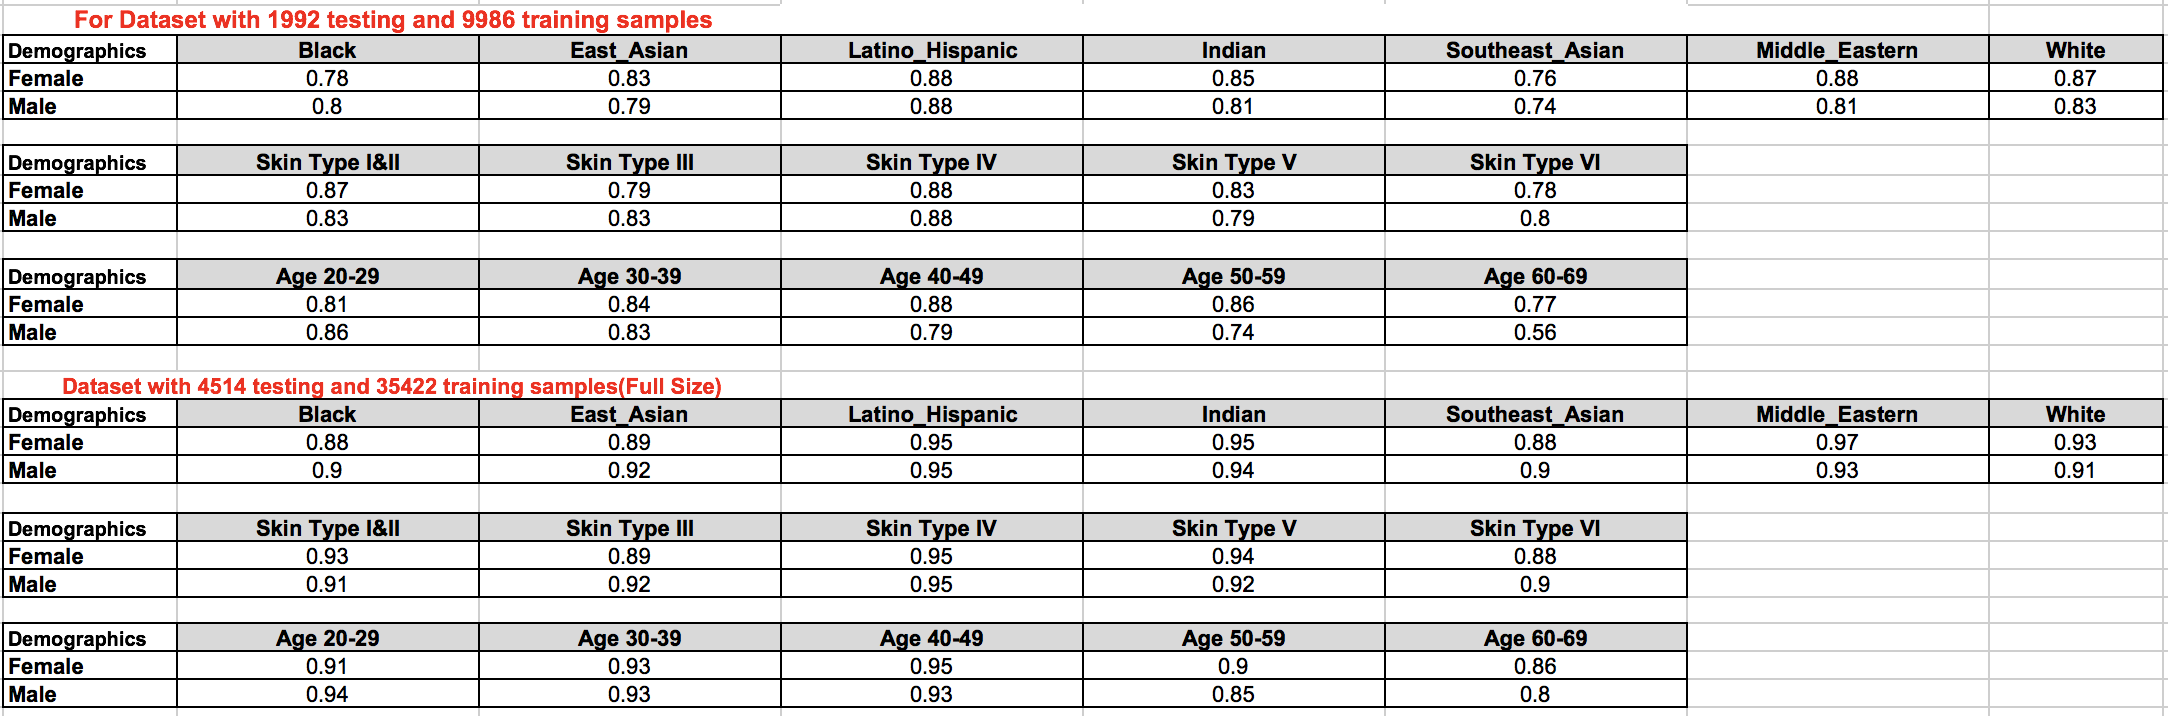